<a href="https://colab.research.google.com/github/karsarobert/MachineLearning2025/blob/main/SVD_bemutat%C3%A1sa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A mesterséges intelligencia matematikai alapjai gyakorlat
# PTE Gépi tanulás

## 11. Gyakorlat: SVD
### 2025. november 24.

Képzeld el, hogy egy mátrix egyfajta "átalakító gép" a vektorok számára. Bedobsz egy vektort, és kijön egy másik, általában megváltozott irányú és hosszúságú vektor.

Nos, a **sajátvektorok** olyan különleges, nullvektortól különböző vektorok, amelyeket ha bedobunk ebbe a "gépbe" (azaz megszorozzuk a mátrixszal), az eredményül kapott vektor *ugyanabba az irányba* mutat, mint az eredeti (vagy pont ellentétes irányba). A mátrix csak megnyújtotta vagy összenyomta őket.

Az a szám, ami megmondja, hogy hányszorosára nyújtotta vagy nyomta össze a mátrix a sajátvektort, az a hozzá tartozó **sajátérték** (ezt gyakran a görög lambda, $\lambda$ betűvel jelöljük).

Tehát, ha $A$ a mátrixunk és $x$ egy sajátvektora, akkor:
$A \cdot x = \lambda \cdot x$

ahol $\lambda$ a sajátérték.

**Egy egyszerű analógia:** Képzelj el egy négyzet alakú gumilapot a koordináta-rendszerben. Ha ezt a lapot egyenletesen megnyújtod a vízszintes (X) irányban kétszeresére, de függőlegesen (Y) nem változtatod meg:
* A vízszintes tengely menti vektorok (pl. [1, 0], [3, 0]) a nyújtás után is vízszintesek maradnak, csak kétszer olyan hosszúak lesznek ([2, 0], [6, 0]). Tehát a vízszintes vektorok **sajátvektorok**, a hozzájuk tartozó **sajátérték pedig 2**.
* A függőleges tengely menti vektorok (pl. [0, 1], [0, -2]) a nyújtás után is függőlegesek maradnak, és a hosszuk sem változik ([0, 1], [0, -2]). Tehát a függőleges vektorok is **sajátvektorok**, a hozzájuk tartozó **sajátérték pedig 1**.
* Egyéb irányú vektorok (pl. [1, 1]) iránya meg fog változni a nyújtás során (az eredmény [2, 1] lesz, ami már nem párhuzamos az [1, 1]-gyel), így ezek általában nem sajátvektorok.

**Miért fontosak ezek?**
* Megmutatják a mátrix által reprezentált transzformáció "fő irányait", azokat az irányokat, ahol a transzformáció a legegyszerűbben viselkedik (csak skálázás történik).
* Alapvetőek sok későbbi módszerhez, mint például a Főkomponens Analízis (PCA), amit később nézünk meg.
* Segítenek a rendszerek stabilitásának elemzésében (pl. egyensúlyi helyzetek vizsgálatánál).

Egy kis érdekesség: A "saját" szó a német "eigen" tükörfordítása, ami szintén "saját"-ot, "jellegzetes"-t jelent. Gyakran találkozhatsz az "eigenvalue" és "eigenvector" angol kifejezésekkel is.

Miért érdekel ez minket? (Machine Learning)

A sajátvektorok nem csak elméleti érdekességek, a gépi tanulás alapkövei:

  * **PCA (Főkomponens Analízis):** Amikor adatokat tömörítünk, a sajátvektorok mutatják meg az adatok "fő irányait", ahol a legnagyobb a szórás (azaz a legtöbb információ).
  * **Stabilitás:** Rendszerek elemzésénél megmutatják, hogy egy állapot stabil-e vagy összeomlik.
  * **Google PageRank:** Az eredeti algoritmus, ami a Google-t híressé tette, lényegében egy óriási mátrix sajátvektorát kereste.

A mátrix:
[[1 1]
 [0 2]]

Sajátértékek (lambda): [1. 2.]
Sajátvektorok (oszloponként):
[[1.         0.70710678]
 [0.         0.70710678]]


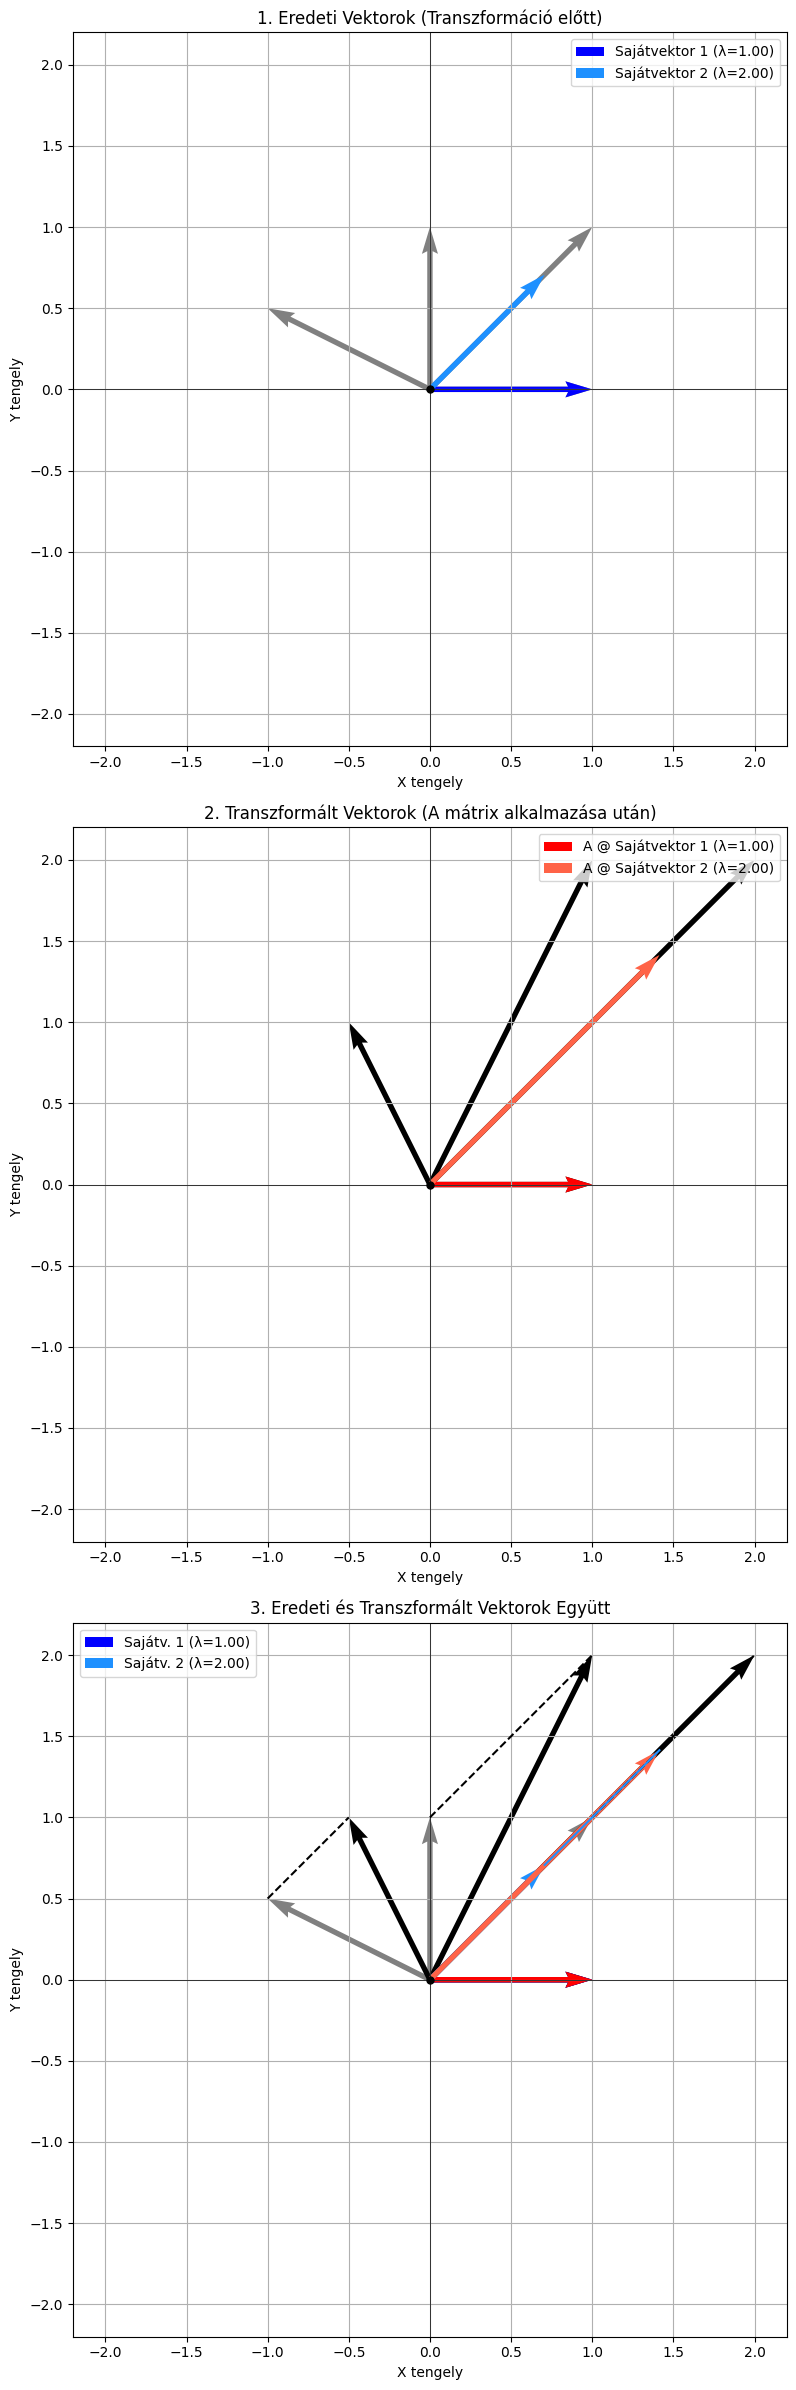


Magyarázat az ábrákhoz:
1. Ábra: Csak az eredeti vektorokat mutatja (szürke = átlagos, kék/világoskék = sajátvektorok).
2. Ábra: Csak a transzformált vektorokat mutatja (fekete = átlagos transzformáltja, piros/paradicsom = sajátvektor transzformáltja).
3. Ábra: Mindent együtt mutat, összekötő vonalakkal jelezve a transzformációt.

Figyeld meg:
- Hogyan változik a szürke vektorok iránya és hossza a fekete vektorokká alakulás során (1. és 2. ábra összehasonlítása, vagy a 3. ábra szaggatott vonalai).
- Hogyan marad a kék sajátvektorok iránya változatlan (csak a hosszuk változik), amikor a piros vektorokká válnak (1. és 2. ábra összehasonlítása, vagy a 3. ábra folytonos vonalai mentén).
- A 2. és 3. ábrán a piros nyilak hossza hányszorosa a megfelelő kék nyilak hosszának az 1. és 3. ábrán? Ennyi a sajátérték.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Beállítások ---
# Definiáljuk a 2x2-es mátrixot (ezt átírhatod más mátrixra is)
A = np.array([
    [1, 1],
    [0, 2]
])

# Számoljuk ki a sajátértékeket és sajátvektorokat
eigenvalues, eigenvectors = np.linalg.eig(A)

print(f"A mátrix:\n{A}")
print(f"\nSajátértékek (lambda): {eigenvalues}")
print(f"Sajátvektorok (oszloponként):\n{eigenvectors}")

# --- Vektorok a vizualizációhoz ---
# Néhány "átlagos" vektor
vectors_to_plot = [
    np.array([1, 0]),
    np.array([0, 1]),
    np.array([1, 1]),
    np.array([-1, 0.5])
]

# A sajátvektorok (a numpy oszloponként adja vissza őket)
eigenvector1 = eigenvectors[:, 0]
eigenvector2 = eigenvectors[:, 1]

# Összes eredeti vektor egy listában a határok számításához
all_original_vectors = vectors_to_plot + [eigenvector1, eigenvector2]
# Összes transzformált vektor kiszámítása
all_transformed_vectors = [A @ v for v in all_original_vectors]

# --- Tengelyhatárok meghatározása ---
# Keressük meg a legnagyobb abszolút koordinátát az összes vektor (eredeti és transzformált) között
max_coord_orig = np.max(np.abs(np.array(all_original_vectors))) if all_original_vectors else 1
max_coord_trans = np.max(np.abs(np.array(all_transformed_vectors))) if all_transformed_vectors else 1
max_val = max(max_coord_orig, max_coord_trans) * 1.1 # Hagyunk egy kis margót

# --- Vizualizáció (3 külön ábra) ---
plt.figure(figsize=(8, 24)) # Magasabb ábra a 3 subplotnak

# --- 1. Ábra: Eredeti Vektorok ---
ax1 = plt.subplot(3, 1, 1) # 3 sor, 1 oszlop, 1. ábra

# Origó
ax1.plot(0, 0, 'ko', markersize=5)

# Eredeti "átlagos" vektorok (szürke)
for v in vectors_to_plot:
    ax1.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='gray', label='_nolegend_')

# Eredeti sajátvektorok (kék)
ax1.quiver(0, 0, eigenvector1[0], eigenvector1[1], angles='xy', scale_units='xy', scale=1, color='blue', label=f'Sajátvektor 1 (λ={eigenvalues[0]:.2f})')
ax1.quiver(0, 0, eigenvector2[0], eigenvector2[1], angles='xy', scale_units='xy', scale=1, color='dodgerblue', label=f'Sajátvektor 2 (λ={eigenvalues[1]:.2f})')

# Beállítások az 1. ábrához
ax1.set_xlim([-max_val, max_val])
ax1.set_ylim([-max_val, max_val])
ax1.set_xlabel("X tengely")
ax1.set_ylabel("Y tengely")
ax1.set_title("1. Eredeti Vektorok (Transzformáció előtt)")
ax1.grid(True)
ax1.set_aspect('equal', adjustable='box')
ax1.axhline(0, color='black',linewidth=0.5)
ax1.axvline(0, color='black',linewidth=0.5)
ax1.legend()

# --- 2. Ábra: Transzformált Vektorok ---
ax2 = plt.subplot(3, 1, 2) # 3 sor, 1 oszlop, 2. ábra

# Origó
ax2.plot(0, 0, 'ko', markersize=5)

# Transzformált "átlagos" vektorok (fekete)
for v in vectors_to_plot:
    Av = A @ v
    ax2.quiver(0, 0, Av[0], Av[1], angles='xy', scale_units='xy', scale=1, color='black', label='_nolegend_')

# Transzformált sajátvektorok (piros)
Av1 = A @ eigenvector1 # Vagy eigenvalues[0] * eigenvector1
Av2 = A @ eigenvector2 # Vagy eigenvalues[1] * eigenvector2
ax2.quiver(0, 0, Av1[0], Av1[1], angles='xy', scale_units='xy', scale=1, color='red', label=f'A @ Sajátvektor 1 (λ={eigenvalues[0]:.2f})')
ax2.quiver(0, 0, Av2[0], Av2[1], angles='xy', scale_units='xy', scale=1, color='tomato', label=f'A @ Sajátvektor 2 (λ={eigenvalues[1]:.2f})')

# Beállítások a 2. ábrához
ax2.set_xlim([-max_val, max_val])
ax2.set_ylim([-max_val, max_val])
ax2.set_xlabel("X tengely")
ax2.set_ylabel("Y tengely")
ax2.set_title("2. Transzformált Vektorok (A mátrix alkalmazása után)")
ax2.grid(True)
ax2.set_aspect('equal', adjustable='box')
ax2.axhline(0, color='black',linewidth=0.5)
ax2.axvline(0, color='black',linewidth=0.5)
ax2.legend()

# --- 3. Ábra: Eredeti és Transzformált Együtt ---
ax3 = plt.subplot(3, 1, 3) # 3 sor, 1 oszlop, 3. ábra

# Origó
ax3.plot(0, 0, 'ko', markersize=5)

# Eredeti "átlagos" vektorok (szürke) és transzformáltjaik (fekete) + összekötő vonal
for v in vectors_to_plot:
    ax3.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='gray', label='_nolegend_')
    Av = A @ v
    ax3.quiver(0, 0, Av[0], Av[1], angles='xy', scale_units='xy', scale=1, color='black', label='_nolegend_')
    ax3.plot([v[0], Av[0]], [v[1], Av[1]], 'k--')

# Eredeti sajátvektorok (kék) és transzformáltjaik (piros) + összekötő vonal
ax3.quiver(0, 0, eigenvector1[0], eigenvector1[1], angles='xy', scale_units='xy', scale=1, color='blue', label=f'Sajátv. 1 (λ={eigenvalues[0]:.2f})')
ax3.quiver(0, 0, Av1[0], Av1[1], angles='xy', scale_units='xy', scale=1, color='red', label='_nolegend_') # A @ v1
ax3.plot([eigenvector1[0], Av1[0]], [eigenvector1[1], Av1[1]], 'b-')

ax3.quiver(0, 0, eigenvector2[0], eigenvector2[1], angles='xy', scale_units='xy', scale=1, color='dodgerblue', label=f'Sajátv. 2 (λ={eigenvalues[1]:.2f})')
ax3.quiver(0, 0, Av2[0], Av2[1], angles='xy', scale_units='xy', scale=1, color='tomato', label='_nolegend_') # A @ v2
ax3.plot([eigenvector2[0], Av2[0]], [eigenvector2[1], Av2[1]], 'dodgerblue', linestyle='-')

# Beállítások a 3. ábrához
ax3.set_xlim([-max_val, max_val])
ax3.set_ylim([-max_val, max_val])
ax3.set_xlabel("X tengely")
ax3.set_ylabel("Y tengely")
ax3.set_title("3. Eredeti és Transzformált Vektorok Együtt")
ax3.grid(True)
ax3.set_aspect('equal', adjustable='box')
ax3.axhline(0, color='black',linewidth=0.5)
ax3.axvline(0, color='black',linewidth=0.5)
ax3.legend()

plt.tight_layout() # Növeli a subplotok közötti helyet
plt.show()

print("\nMagyarázat az ábrákhoz:")
print("1. Ábra: Csak az eredeti vektorokat mutatja (szürke = átlagos, kék/világoskék = sajátvektorok).")
print("2. Ábra: Csak a transzformált vektorokat mutatja (fekete = átlagos transzformáltja, piros/paradicsom = sajátvektor transzformáltja).")
print("3. Ábra: Mindent együtt mutat, összekötő vonalakkal jelezve a transzformációt.")
print("\nFigyeld meg:")
print("- Hogyan változik a szürke vektorok iránya és hossza a fekete vektorokká alakulás során (1. és 2. ábra összehasonlítása, vagy a 3. ábra szaggatott vonalai).")
print("- Hogyan marad a kék sajátvektorok iránya változatlan (csak a hosszuk változik), amikor a piros vektorokká válnak (1. és 2. ábra összehasonlítása, vagy a 3. ábra folytonos vonalai mentén).")
print("- A 2. és 3. ábrán a piros nyilak hossza hányszorosa a megfelelő kék nyilak hosszának az 1. és 3. ábrán? Ennyi a sajátérték.")

Amikor a rendszer összeomlik (Szinguláris Mátrix)**

##Szinguláris Mátrixok

Az SVD megértéséhez kulcsfontosságú a **szingularitás** fogalma. Egy mátrix akkor szinguláris, ha "összelapítja" a teret.

  * A determinánsa 0.
  * Nincs inverze (nem lehet visszacsinálni a műveletet).
  * Információt veszítünk: 2D-ből 1D-be (egyenesre) vagy 0D-be (pontba) nyomja a vektorokat.

Az alábbi példában egy olyan mátrixot látunk, aminek a sorai összefüggnek ($sor_2 = 2 \times sor_1$).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- SEGÉDFÜGGVÉNY A VIZUALIZÁCIÓHOZ ---
# Ezt fogjuk használni végig a notebookban, hogy lássuk a vektorokat
def plot_vectors(vectors, colors, title="Vektorok"):
    """
    Kirajzolja a megadott vektorokat az origóból indítva.
    vectors: lista a vektorokról (pl. [v1, v2])
    colors: lista a színekről
    """
    plt.figure(figsize=(6, 6))
    ax = plt.gca()

    # Vektorok kirajzolása nyílként (quiver)
    for v, c in zip(vectors, colors):
        plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color=c, width=0.015, headwidth=4)

    # Rács és tengelyek beállítása
    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    max_val = max(max(np.abs(x_vals)), max(np.abs(y_vals))) + 1 # Dinamikus határok

    plt.xlim(-max_val, max_val)
    plt.ylim(-max_val, max_val)
    plt.axhline(0, color='black', linewidth=1) # X tengely
    plt.axvline(0, color='black', linewidth=1) # Y tengely
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.gca().set_aspect('equal') # Fontos: torzításmentes megjelenítés!
    plt.title(title)
    plt.show()



Mátrix determinánsa: 0.00 (Nulla, tehát szinguláris)
Transzformált v1: [1 2]
Transzformált v2: [1 2]


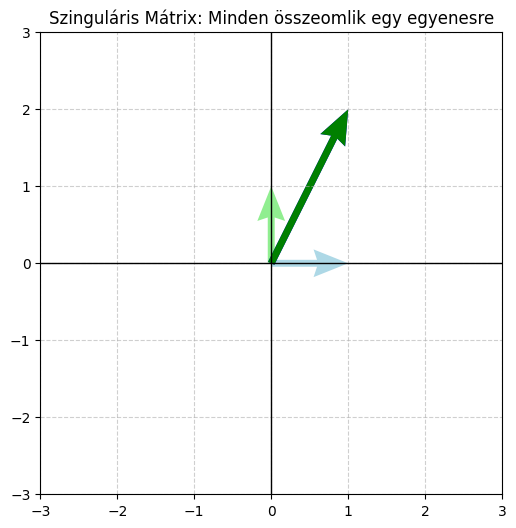

In [ ]:
# --- SZINGULÁRIS MÁTRIX PÉLDA ---
# Figyeld meg: a második sor az első kétszerese!
A_sing = np.array([[1, 1],
                   [2, 2]])

# Vegyünk két teljesen különböző vektort
v1 = np.array([1, 0])
v2 = np.array([0, 1])

# Transzformáljuk őket
t1 = A_sing @ v1
t2 = A_sing @ v2

print(f"Mátrix determinánsa: {np.linalg.det(A_sing):.2f} (Nulla, tehát szinguláris)")
print(f"Transzformált v1: {t1}")
print(f"Transzformált v2: {t2}")

# Ábrázolás: Látni fogjuk, hogy mindkét vektor ugyanarra az egyenesre kerül!
plot_vectors([v1, v2, t1, t2], ['lightblue', 'lightgreen', 'blue', 'green'],
             title="Szinguláris Mátrix: Minden összeomlik egy egyenesre")

## Normák jelentősége az SVD-nél

Gyakran felmerül a kérdés: *Miért foglalkozunk normákkal?*
Az SVD lényege, hogy megtaláljuk azokat az irányokat, ahol a mátrix a **legnagyobbat nyújtja** a téren. De mit jelent a "legnagyobb nyújtás"? Ehhez mérnünk kell a vektorok hosszát és a mátrix "erejét".

1.  **Vektor norma ($||x||$):** A vektor hossza.
2.  **Mátrix norma ($||A||$):** Azt méri, hogy a mátrix *maximálisan* hányszorosára tud megnyújtani egy egységvektort.
      * Az SVD legnagyobb szinguláris értéke ($\sigma_1$) pontosan a mátrix úgynevezett **spektrálnormája** ($||A||_2$).
      * A Frobenius-norma (elemek négyzetösszege) pedig segít mérni a "tömörítési hibát", amikor eldobunk adatokat.


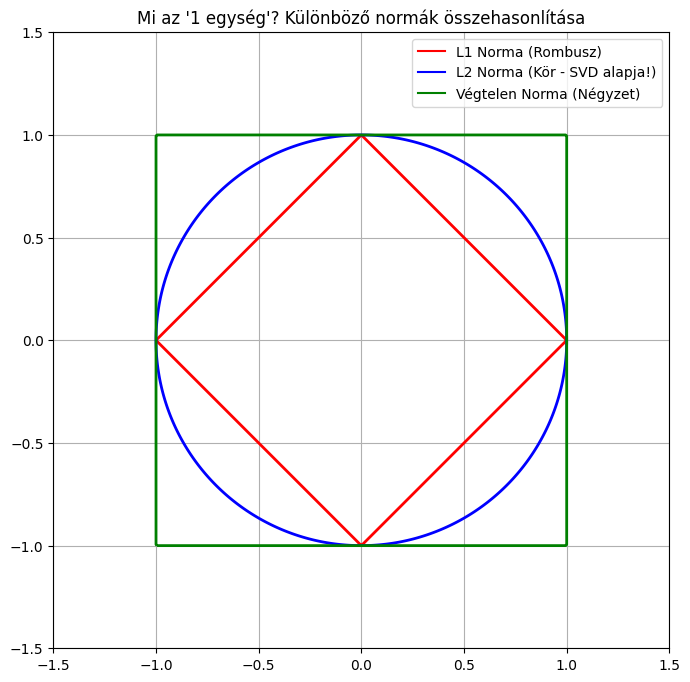

In [ ]:
# --- NORMÁK VIZUALIZÁCIÓJA ---
# Kirajzoljuk az "Egységkört" különböző normák szerint.
# Ez mutatja meg, mit tekintünk "1 egységnyi" távolságnak.

x = np.linspace(-1.5, 1.5, 500)
y = np.linspace(-1.5, 1.5, 500)
X, Y = np.meshgrid(x, y)

# L1 norma: |x| + |y| (Manhattan távolság) -> Rombusz
L1 = np.abs(X) + np.abs(Y)

# L2 norma: sqrt(x^2 + y^2) (Euklideszi távolság) -> Kör
L2 = np.sqrt(X**2 + Y**2)

# Végtelen norma: max(|x|, |y|) -> Négyzet
L_inf = np.maximum(np.abs(X), np.abs(Y))

plt.figure(figsize=(8, 8))
# Kontúrok, ahol a norma értéke pontosan 1
plt.contour(X, Y, L1, levels=[1], colors=['red'], linewidths=2)
plt.contour(X, Y, L2, levels=[1], colors=['blue'], linewidths=2)
plt.contour(X, Y, L_inf, levels=[1], colors=['green'], linewidths=2)

# Jelmagyarázat (trükkös megoldás a plot-hoz)
plt.plot([], [], 'r', label='L1 Norma (Rombusz)')
plt.plot([], [], 'b', label='L2 Norma (Kör - SVD alapja!)')
plt.plot([], [], 'g', label='Végtelen Norma (Négyzet)')

plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal')
plt.title("Mi az '1 egység'? Különböző normák összehasonlítása")
plt.show()

**1. Normák: A "Méret" Mérése**

Egyszerűen fogalmazva, a **norma** egy függvény, ami egy vektorhoz vagy egy mátrixhoz egy nemnegatív számot rendel, ami annak a "méretét" vagy "hosszát" jellemzi. Olyan, mint egy általánosított távolságfogalom.

Ahhoz, hogy valamit normának nevezhessünk, teljesítenie kell pár alapvető tulajdonságot:
* Mindig nemnegatív, és csak a nullvektor (vagy nullmátrix) normája nulla.
* Ha megszorzol egy vektort egy számmal (skalárral), a normája a szám abszolút értékével szorzódik.
* A háromszög-egyenlőtlenség: Két vektor összegének normája sosem nagyobb, mint a normáik összege ( `||x + y|| <= ||x|| + ||y||` ).

**Népszerű Vektornormák:**

* **L2-norma (Euklideszi norma):** Ez a leggyakrabban használt, a hagyományos "távolság" az origótól. Úgy számolod ki, hogy összeadod a vektor elemeinek négyzeteit, és az összegből négyzetgyököt vonsz.
    * Jelölés: `||x||₂`
    * Képlet: `sqrt(x₁² + x₂² + ... + xn²)`
    * *Analógia:* Két pont közötti légvonalbeli távolság a térképen.
* **L1-norma (Manhattan vagy Taxicab norma):** Itt összeadod a vektor elemeinek abszolút értékeit.
    * Jelölés: `||x||₁`
    * Képlet: `|x₁| + |x₂| + ... + |xn|`
    * *Analógia:* Távolság egy városban, ahol csak derékszögű utcákon (vízszintesen és függőlegesen) közlekedhetsz, mint egy taxi Manhattanben.
* **L-végtelen norma (Maximum norma):** Ez egyszerűen a legnagyobb abszolút értékű elem a vektorban.
    * Jelölés: `||x||<0xE2><0x88><0x9E>`
    * Képlet: `max(|x₁|, |x₂|, ..., |xn|)`
    * *Analógia:* Melyik irányban "nyúlik ki" legmesszebbre a vektorod az origótól a koordinátatengelyek mentén.

**Mátrixnormák:** Ezek azt mérik, hogy egy mátrix mennyire "nyújtja meg" a vektorokat, amikor transzformálja őket. Különböző definíciók vannak (pl. 1-norma, ∞-norma, 2-norma/spektrálnorma), de az alapötlet hasonló: a mátrix "erejének" mérése. A 2-norma például a legnagyobb nyújtási tényezőt adja meg (ami, mint látni fogjuk, a legnagyobb szinguláris értékkel egyenlő).

**2. Kondíciószám: Az "Érzékenység" Mércéje**

A **kondíciószám** (jelölése gyakran `κ(A)` vagy `cond(A)`) azt méri, hogy egy mátrix (és a hozzá kapcsolódó probléma, pl. egyenletrendszer) mennyire érzékeny a bemeneti adatok kis változásaira.

* *Analógia:* Gondolj egy régi, instabil asztalra. Ha csak finoman hozzáérsz (kis változás a bemeneten), lehet, hogy erősen meginog, és leesik róla valami (nagy változás a kimeneten). Ez egy "rosszul kondicionált" asztal. Egy stabil, masszív asztal (jól kondicionált) alig reagál egy kis lökésre.
* **Mit jelent?**
    * **Nagy kondíciószám:** A mátrix *rosszul kondicionált*. Kis hiba a bemenetben (pl. mérési pontatlanság, kerekítési hiba a számítógépben) nagy hibát okozhat a kimenetben (pl. az `Ax=b` egyenletrendszer `x` megoldásában). Az ilyen rendszerekkel óvatosan kell bánni a numerikus számítások során.
    * **Kicsi kondíciószám (1-hez közeli):** A mátrix *jól kondicionált*. A bemeneti hibák hatása nem erősödik fel jelentősen a kimenetben.
* **Definíció:** Egy invertálható `A` mátrixra a kondíciószám `κ(A) = ||A|| ⋅ ||A⁻¹||`, ahol `||...||` valamilyen mátrixnormát jelöl. Mindig `κ(A) ≥ 1`.
* **Kapcsolat a szinguláris értékekkel (előreutalás):** A 2-es (spektrális) mátrixnorma esetén a kondíciószám pontosan a legnagyobb és a legkisebb szinguláris érték hányadosa: `κ₂(A) = σ_max / σ_min`. Ebből is látszik, hogy ha a legkisebb szinguláris érték nagyon pici a legnagyobhoz képest (a mátrix "majdnem szinguláris", azaz majdnem nem invertálható), akkor a kondíciószám nagy lesz.

Tehát a normák segítenek a vektorok és mátrixok "méretét" számszerűsíteni, a kondíciószám pedig figyelmeztet minket a lehetséges numerikus problémákra, amikor ezekkel a mátrixokkal dolgozunk.

A vizsgált vektor: v = [ 3 -4]

L1 Norma (Manhattan): ||v||₁ = 7.0
L2 Norma (Euklideszi): ||v||₂ = 5.0000


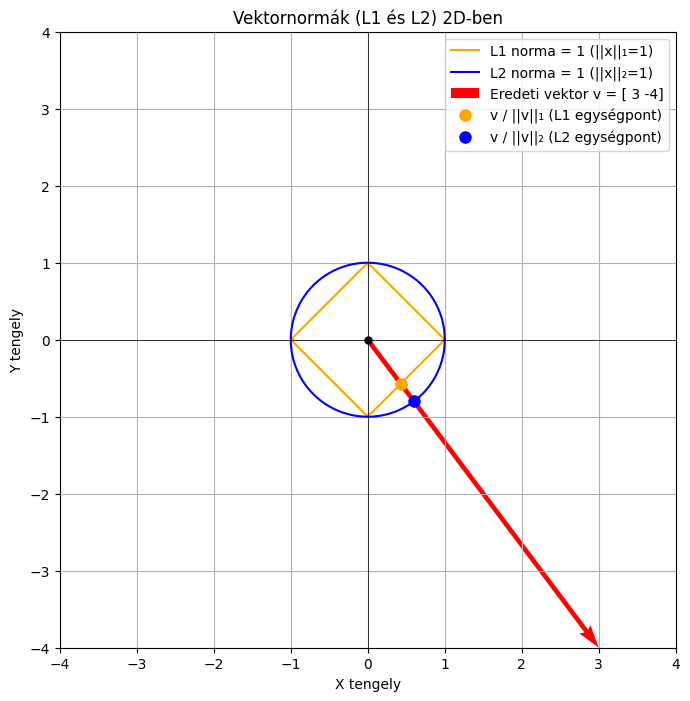


Magyarázat az ábrához:
- A piros nyíl mutatja az eredeti 'v' vektort.
- A kék kör (L2 norma = 1) tartalmazza azokat a pontokat, amelyek 'szokásos' (Euklideszi) távolsága az origótól pontosan 1.
- A narancssárga négyzet (L1 norma = 1) tartalmazza azokat a pontokat, amelyek koordinátáinak abszolút összege pontosan 1 (Manhattan távolság).
- A kék és narancssárga pöttyök (ha látszanak) azt a pontot jelölik a megfelelő egység alakzaton, amerre az eredeti vektor mutat.
- A kiszámolt L1 és L2 normák megadják a vektor 'hosszát' a két különböző mérési mód szerint.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Beállítások ---
# --- Itt módosíthatod a 2D vektort! ---
v = np.array([3, -4])
# Példák:
# v = np.array([1, 1])
# v = np.array([-2, 3])
# ------------------------------------

print(f"A vizsgált vektor: v = {v}")
if v.shape != (2,):
  print("Figyelmeztetés: A kód vizualizációja 2D vektorokra lett tervezve.")
  # Megpróbáljuk az első két elemet használni, ha több van
  if len(v) >= 2:
    v = v[:2]
    print(f"Csak az első két elemet használjuk: v = {v}")
  else:
    print("Hibás vektor dimenzió a vizualizációhoz.")
    # Itt akár le is állhatna a kód, vagy alapértelmezett vektort használhatna
    v = np.array([1,1]) # Alapértelmezett, ha gond van

# Normák kiszámítása NumPy segítségével
norm_L1 = np.linalg.norm(v, ord=1)
norm_L2 = np.linalg.norm(v, ord=2) # Ez az alapértelmezett

print(f"\nL1 Norma (Manhattan): ||v||₁ = {norm_L1}")
print(f"L2 Norma (Euklideszi): ||v||₂ = {norm_L2:.4f}") # Kerekítve a szebb kiírásért

# --- Vizualizáció ---
plt.figure(figsize=(8, 8))
ax = plt.gca()

# Az origó
ax.plot(0, 0, 'ko', markersize=5)

# L1 egység alakzat (átlós négyzet) kiszámítása
# (Pontosabb számítási mód, mint az előző verzióban)
x_l1_calc = []
y_l1_calc = []
angle = np.linspace(0, 2*np.pi, 100)
for ang in angle:
    cos_a = np.cos(ang)
    sin_a = np.sin(ang)
    # Elkerüljük a nullával osztást
    if np.abs(cos_a) + np.abs(sin_a) > 1e-9:
        r = 1 / (np.abs(cos_a) + np.abs(sin_a))
        x_l1_calc.append(r * cos_a)
        y_l1_calc.append(r * sin_a)

# L2 egységkör (valódi kör)
theta = np.linspace(0, 2 * np.pi, 100)
x_l2 = np.cos(theta)
y_l2 = np.sin(theta)

# Egység alakzatok kirajzolása
ax.plot(x_l1_calc, y_l1_calc, label='L1 norma = 1 (||x||₁=1)', color='orange')
ax.plot(x_l2, y_l2, label='L2 norma = 1 (||x||₂=1)', color='blue')

# Az eredeti vektor kirajzolása
ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='red', label=f'Eredeti vektor v = {v}')

# Opcionális: A normált vektorok kirajzolása (hol metszenék az egység alakzatokat)
# Ezek a pontok rajta lesznek a megfelelő színű alakzaton
if norm_L1 > 1e-9:
    v_normed_L1 = v / norm_L1
    ax.plot(v_normed_L1[0], v_normed_L1[1], 'o', color='orange', markersize=8, label=f'v / ||v||₁ (L1 egységpont)')
if norm_L2 > 1e-9:
    v_normed_L2 = v / norm_L2
    ax.plot(v_normed_L2[0], v_normed_L2[1], 'o', color='blue', markersize=8, label=f'v / ||v||₂ (L2 egységpont)')

# Ábra beállításai
plt.title("Vektornormák (L1 és L2) 2D-ben")
plt.xlabel("X tengely")
plt.ylabel("Y tengely")
plt.grid(True)
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.set_aspect('equal', adjustable='box') # Fontos az alakzatok helyes megjelenítéséhez

# Jelmagyarázat elhelyezése (lehet, hogy az ábrán kívülre kell tenni)
plt.legend(loc='best')
# Ha a jelmagyarázat takar, próbáld ezt:
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Tengelyhatárok beállítása, hogy minden látszódjon
max_lim = max(np.abs(v).max(), 1.2) # Legalább az egység alakzatok látszódjanak
ax.set_xlim([-max_lim, max_lim])
ax.set_ylim([-max_lim, max_lim])

plt.show()

print("\nMagyarázat az ábrához:")
print("- A piros nyíl mutatja az eredeti 'v' vektort.")
print("- A kék kör (L2 norma = 1) tartalmazza azokat a pontokat, amelyek 'szokásos' (Euklideszi) távolsága az origótól pontosan 1.")
print("- A narancssárga négyzet (L1 norma = 1) tartalmazza azokat a pontokat, amelyek koordinátáinak abszolút összege pontosan 1 (Manhattan távolság).")
print("- A kék és narancssárga pöttyök (ha látszanak) azt a pontot jelölik a megfelelő egység alakzaton, amerre az eredeti vektor mutat.")
print("- A kiszámolt L1 és L2 normák megadják a vektor 'hosszát' a két különböző mérési mód szerint.")

### 1. A Piros Nyíl: Az Eredeti Vektor (`v`)
* **Mit látunk:** Egy piros nyíl, amely az origóból $(0,0)$ indul és a $(3, -4)$ pontba mutat.
* **Jelentése:** Ez a kódodban definiált `v = np.array([3, -4])`.
* **Hossza:** Láthatóan "kilóg" az ábráról, mivel a tengelyek csak kb. 1.2-ig vannak skálázva, míg a vektor koordinátái 3 és -4. Ez szándékos, hogy a figyelmet az origó körüli kis alakzatokra (az "egységkörökre") irányítsa.

### 2. A Kék Kör: L2 Norma "Egységköre"
* **Mit látunk:** Egy szabályos kör, kék színnel.
* **Matematika:** Ez az Euklideszi norma egysége ($||x||_2 = 1$). A körvonal minden pontja pontosan 1 távolságra van a középponttól a hagyományos (légvonalbeli) mérés szerint.
* **Kék pötty:** Azt a pontot jelöli, ahol a piros vektor iránya metszi ezt a kört.
    * Ez a vektor **L2 szerinti normalizált** változata.
    * Koordinátái: $v / 5 = (0.6, -0.8)$.

### 3. A Narancssárga Rombusz: L1 Norma "Egységköre"
* **Mit látunk:** Egy csúcsára állított négyzet (rombusz), narancssárga színnel.
* **Matematika:** Ez a Manhattan norma egysége ($||x||_1 = 1$). Ennek az alakzatnak a szélén lévő bármely pont koordinátáinak abszolút összege pontosan 1 (pl. $0.5 + 0.5 = 1$).
* **Narancs pötty:** Azt a pontot jelöli, ahol a piros vektor iránya metszi ezt a rombuszt.
    * Ez a vektor **L1 szerinti normalizált** változata.
    * Koordinátái: $v / 7 \approx (0.43, -0.57)$.

### Mi a tanulság az ábrából?

1.  **A "Hossz" relatív:** Ugyanannak a piros vektornak kétféle "hossza" van:
    * **L2 (Kék világ):** 5 egység (Pitagorasz-tétel: $\sqrt{3^2 + (-4)^2}$).
    * **L1 (Narancs világ):** 7 egység (Összeadás: $|3| + |-4|$).
    * Mivel az L1 mérés "szigorúbb" (csak tengelyek mentén lépkedhet), nagyobb számot ad eredményül (7 > 5).

2.  **Az Egység fogalma:**
    * Az ábrán jól látszik, hogy az L1 norma (narancs) egység-alakzata a kék körön **belül** helyezkedik el (kivéve a tengelyeket, ahol érintkeznek).
    * Ez azt jelenti vizuálisan, hogy ahhoz, hogy L1 szerint elérjük az "1-es távolságot", kevesebbet haladhatunk a térben (Euklideszi értelemben), ha átlósan megyünk.

**Röviden:** A kép azt mutatja meg, hogyan torzul a "távolság" fogalma, ha nem légvonalban (kék), hanem rácsszerűen (narancs) mérünk, és hogyan néz ki az "1 méter" ezekben a világokban.

Vizsgált mátrix A:
[[2.  0.5]
 [0.5 1.5]]

A mátrix 2-es normája (||A||₂): 2.3090
Ez azt jelenti, hogy a mátrix legfeljebb ennyiszeresére nyújt meg egy vektort.


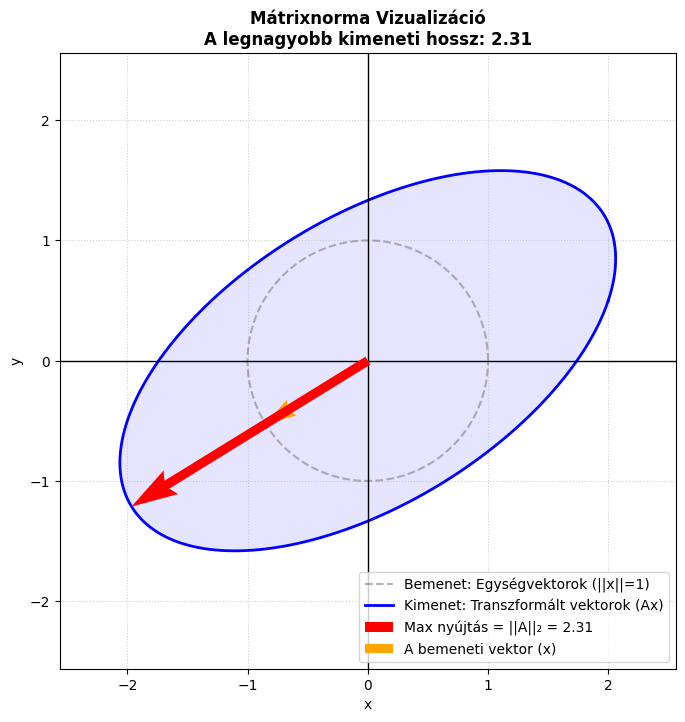


Magyarázat az ábrához:
- Szürke kör: Az összes lehetséges 1 egység hosszú bemeneti vektor.
- Kék ellipszis: Hová kerülnek ezek a pontok a mátrixszorzás után.
- Piros nyíl: A LEGTÁVOLABBI pont az ellipszisen. Ennek a hossza a MÁTRIX NORMÁJA.
  (Vedd észre: A mátrixnorma nem más, mint a 'legrosszabb eset' - mennyire tudja a mátrix 'szétrántani' a teret.)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Mátrix Definíciója ---
# Próbáld ki más értékekkel is!
# Ez a mátrix forgat és nyújt
A = np.array([
    [2.0, 0.5],
    [0.5, 1.5]
])

print(f"Vizsgált mátrix A:\n{A}")

# --- 2. A Mátrixnorma Kiszámítása (Spektrálnorma / 2-norma) ---
# Ez a legnagyobb szinguláris értékkel egyenlő (max nyújtás)
norm_A = np.linalg.norm(A, ord=2)
print(f"\nA mátrix 2-es normája (||A||₂): {norm_A:.4f}")
print("Ez azt jelenti, hogy a mátrix legfeljebb ennyiszeresére nyújt meg egy vektort.")

# --- 3. Vizualizáció Előkészítése ---

# A) Bemeneti vektorok: Egy "Egységkör"
# Csupa olyan vektor, aminek hossza pontosan 1
theta = np.linspace(0, 2*np.pi, 200)
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)
unit_vectors = np.vstack((unit_circle_x, unit_circle_y))

# B) Kimeneti vektorok: Transzformáció
# Minden egységvektort megszorzunk a mátrixszal -> Ellipszist kapunk
transformed_vectors = A @ unit_vectors

# C) A "Legjobban megnyúlt" vektor megtalálása
# Kiszámoljuk az összes transzformált vektor hosszát
lengths = np.linalg.norm(transformed_vectors, axis=0)
max_idx = np.argmax(lengths) # Hol a legnagyobb?

# A nyertes vektorok (bemenet és kimenet)
v_max_input = unit_vectors[:, max_idx]
v_max_output = transformed_vectors[:, max_idx]

# --- 4. Ábrázolás ---
fig, ax = plt.subplots(figsize=(8, 8))

# 1. Az Eredeti Egységkör (Szürke szaggatott)
ax.plot(unit_circle_x, unit_circle_y, 'gray', linestyle='--', alpha=0.6, label='Bemenet: Egységvektorok (||x||=1)')

# 2. A Transzformált Alakzat / Ellipszis (Kék)
ax.plot(transformed_vectors[0, :], transformed_vectors[1, :], 'b-', linewidth=2, label='Kimenet: Transzformált vektorok (Ax)')
ax.fill(transformed_vectors[0, :], transformed_vectors[1, :], 'blue', alpha=0.1)

# 3. A MAXIMÁLIS nyújtás berajzolása (Piros nyíl)
# Ez mutatja meg a mátrix normáját!
ax.quiver(0, 0, v_max_output[0], v_max_output[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.015, zorder=5, label=f'Max nyújtás = ||A||₂ = {norm_A:.2f}')

# (Opcionális) Az eredeti vektor, amiből ez lett (Narancs nyíl)
ax.quiver(0, 0, v_max_input[0], v_max_input[1], angles='xy', scale_units='xy', scale=1, color='orange', width=0.010, zorder=4, label='A bemeneti vektor (x)')

# Formázás
ax.set_title(f"Mátrixnorma Vizualizáció\nA legnagyobb kimeneti hossz: {norm_A:.2f}", fontsize=12, fontweight='bold')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
ax.grid(True, linestyle=':', alpha=0.6)
ax.set_aspect('equal')
ax.legend(loc='lower right')

# Határok beállítása
limit = max(np.max(np.abs(transformed_vectors)), 2) + 0.5
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit)

plt.show()

print("\nMagyarázat az ábrához:")
print("- Szürke kör: Az összes lehetséges 1 egység hosszú bemeneti vektor.")
print("- Kék ellipszis: Hová kerülnek ezek a pontok a mátrixszorzás után.")
print("- Piros nyíl: A LEGTÁVOLABBI pont az ellipszisen. Ennek a hossza a MÁTRIX NORMÁJA.")
print("  (Vedd észre: A mátrixnorma nem más, mint a 'legrosszabb eset' - mennyire tudja a mátrix 'szétrántani' a teret.)")

**Mi az a Sajátérték Felbontás?**

A sajátérték felbontás (angolul Eigenvalue Decomposition, EVD) egy módszer, amellyel bizonyos **négyzetes mátrixokat** fel tudunk bontani három másik mátrix szorzatára. Ezek a mátrixok szorosan kapcsolódnak a mátrix **sajátértékeihez és sajátvektoraihoz**.

A felbontás akkor létezik és különösen szép, ha az $n \times n$-es $A$ mátrixnak van $n$ darab lineárisan független sajátvektora. (Jó hír: ez minden **szimmetrikus mátrixra** igaz!)

A felbontás általános alakja:
$A = X \Lambda X^{-1}$

Nézzük meg az összetevőket:
* **A:** Az eredeti $n \times n$-es mátrix, amit felbontunk.
* **X:** Egy $n \times n$-es mátrix, amelynek **oszlopai** az $A$ mátrix (lineárisan független) **sajátvektorai**.
* **Λ (Lambda):** Egy $n \times n$-es **diagonális mátrix**. Ez azt jelenti, hogy csak a főátlójában vannak nullától különböző elemek, mindenhol máshol nulla áll. A főátlóban pontosan az $A$ mátrix **sajátértékei** szerepelnek, mégpedig ugyanabban a sorrendben, ahogy a hozzájuk tartozó sajátvektorok az $X$ mátrix oszlopaiban vannak.
* **X⁻¹:** Az $X$ mátrix inverze.

**A Szimmetrikus Mátrixok Szuperképessége:**

Ha az $A$ mátrix szimmetrikus (azaz $A = A^T$, a főátlóra tükrözve ugyanazt kapjuk), akkor a dolgok még egyszerűbbé válnak! Ilyenkor a sajátvektorok választhatók úgy, hogy **ortogonálisak** legyenek egymásra (merőlegesek), és egységnyi hosszúak. Az ilyen sajátvektorokból álló $X$ mátrix **ortogonális mátrix** lesz, aminek szuper tulajdonsága, hogy az inverze egyszerűen a transzponáltja ($X^{-1} = X^T$).
Így szimmetrikus $A$ esetén a felbontás:
$A = X \Lambda X^T$
(Itt $X$ ortogonális, $\Lambda$ diagonális a sajátértékekkel.) Ez egy nagyon gyakran használt és fontos forma!

**Mi a Geometriai Jelentése?**

Képzeld el megint, hogy az $A$ mátrix egy transzformációt végez a térben. A $A = X \Lambda X^{-1}$ felbontás ezt a transzformációt három egyszerűbb lépésre bontja:
1.  **X⁻¹ (vagy Xᵀ): Bázisváltás.** Először "elforgatjuk" a koordináta-rendszerünket úgy, hogy az új tengelyek pontosan a sajátvektorok irányába mutassanak.
2.  **Λ: Skálázás.** Ebben az új, sajátvektorok által meghatározott koordináta-rendszerben a transzformáció nagyon egyszerű: csak nyújtás vagy összenyomás történik az egyes új tengelyek (sajátvektorok) mentén, a megfelelő sajátértékek ($\lambda_i$) mértékével. Nincs semmi forgatás vagy nyírás ebben a "saját" rendszerben!
3.  **X: Visszaváltás.** Végül visszaforgatjuk a koordináta-rendszert az eredeti állapotába.

**Miért Hasznos Ez?**

* **Mátrixhatványok Könnyedén:** Mi van, ha $A^2$-et, $A^3$-t vagy $A^{100}$-at kell kiszámolni? A sajátérték felbontással ez pofonegyszerű!
  $ A^k = (X \Lambda X^{-1})^k = (X \Lambda X^{-1})(X \Lambda X^{-1})...(X \Lambda X^{-1}) $
  A középső $X^{-1}X$ tagok kiesnek (egységmátrixot adnak), így marad:
  $A^k = X \Lambda^k X^{-1}$
  És mivel $\Lambda$ diagonális, $\Lambda^k$ kiszámítása csak annyi, hogy a főátlójában lévő sajátértékeket kell a k-adik hatványra emelni! Ez rengeteg számítást megspórolhat.
* **Alkalmazások:** Fontos szerepet játszik dinamikus rendszerek elemzésében, differenciálegyenlet-rendszerek megoldásában, és a Főkomponens Analízis (PCA) szimmetrikus kovarianciamátrixok esetén lényegében a sajátérték felbontáson alapul.

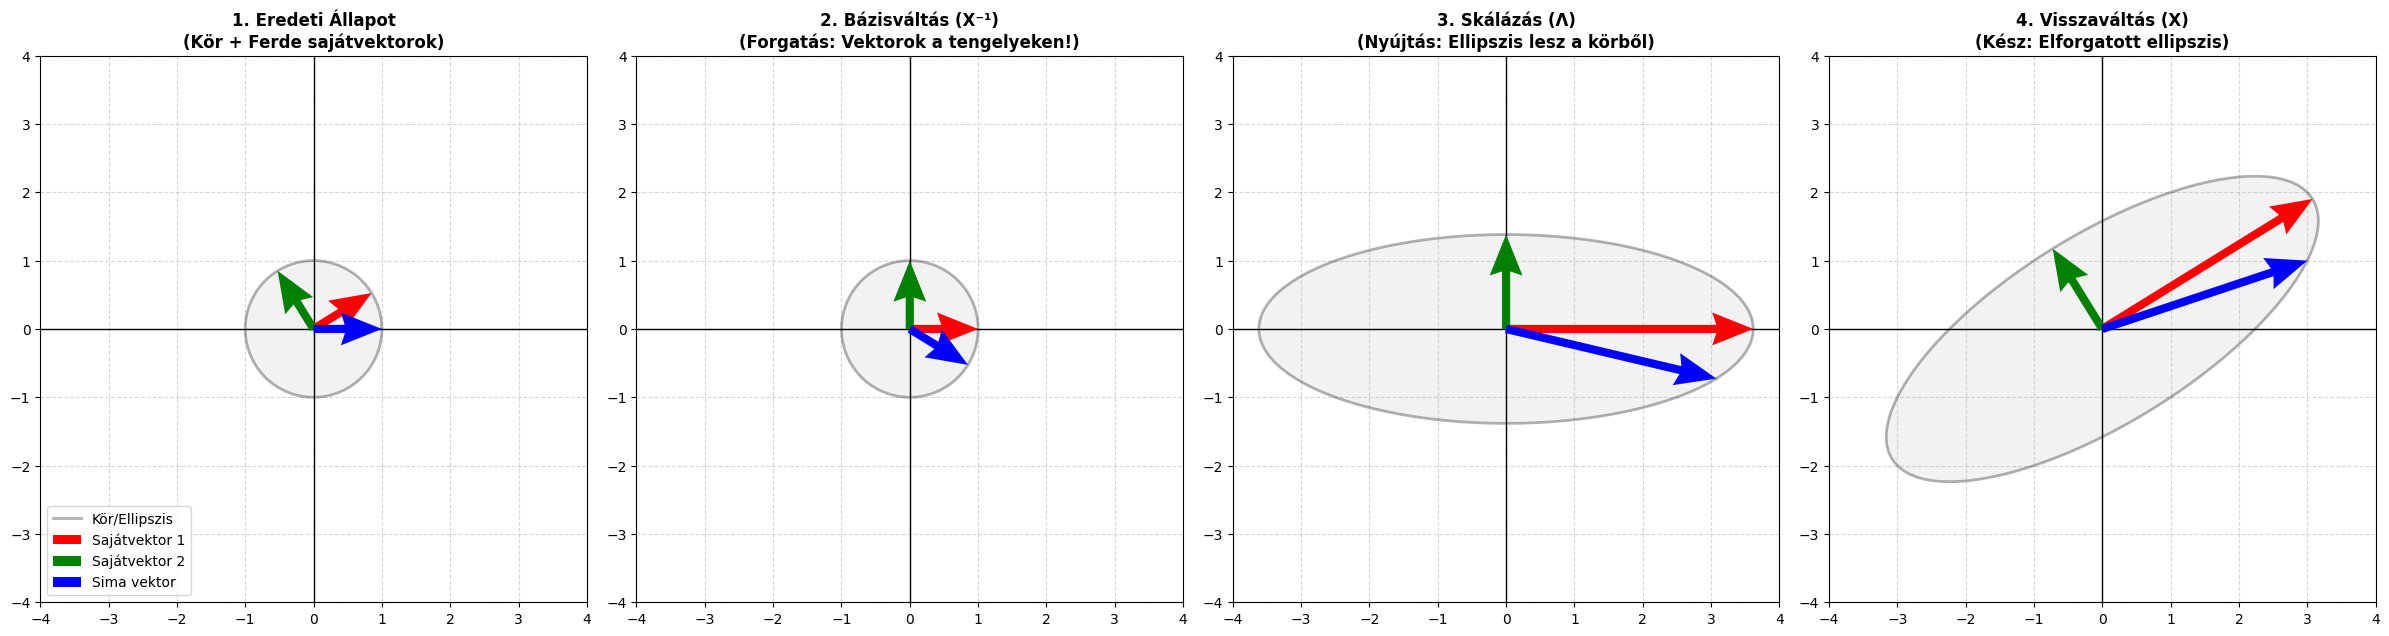

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. A Mátrix és az EVD ---
A = np.array([[3, 1],
              [1, 2]]) # Szimmetrikus mátrix

eigenvalues, eigenvectors = np.linalg.eig(A)

X = eigenvectors
Lambda = np.diag(eigenvalues)
X_inv = np.linalg.inv(X)

# --- 2. Adatok Generálása ---

# A) A KÖR (100 pont a kerületen)
theta = np.linspace(0, 2*np.pi, 100)
circle = np.array([np.cos(theta), np.sin(theta)])

# B) A VEKTOROK
v1 = eigenvectors[:, 0] # 1. Sajátvektor (Piros)
v2 = eigenvectors[:, 1] # 2. Sajátvektor (Zöld)
v3 = np.array([1, 0])   # Egy sima bázisvektor (Kék) - csak összehasonlításnak

# Összegyűjtjük őket egy mátrixba a könnyű szorzásért
vectors_matrix = np.column_stack((v1, v2, v3))

# --- 3. A Három Lépés Kiszámítása (Körre és Vektorokra is) ---

# 1. Lépés: Eredeti állapot
step0_circle = circle
step0_vectors = vectors_matrix

# 2. Lépés: Bázisváltás (X inverze -> Forgatás)
step1_circle = X_inv @ circle
step1_vectors = X_inv @ vectors_matrix

# 3. Lépés: Skálázás (Lambda -> Nyújtás)
step2_circle = Lambda @ step1_circle
step2_vectors = Lambda @ step1_vectors

# 4. Lépés: Visszaváltás (X -> Visszaforgatás)
step3_circle = X @ step2_circle
step3_vectors = X @ step2_vectors

# --- 4. Vizualizáció ---
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

titles = [
    "1. Eredeti Állapot\n(Kör + Ferde sajátvektorok)",
    "2. Bázisváltás (X⁻¹)\n(Forgatás: Vektorok a tengelyeken!)",
    "3. Skálázás (Λ)\n(Nyújtás: Ellipszis lesz a körből)",
    "4. Visszaváltás (X)\n(Kész: Elforgatott ellipszis)"
]

# Lista a ciklushoz
data_steps_circle = [step0_circle, step1_circle, step2_circle, step3_circle]
data_steps_vectors = [step0_vectors, step1_vectors, step2_vectors, step3_vectors]

colors = ['r', 'g', 'b'] # Piros=Sajátv1, Zöld=Sajátv2, Kék=Egyéb
labels = ['Sajátvektor 1', 'Sajátvektor 2', 'Sima vektor']

for i, ax in enumerate(axes):
    # A) Kör (vagy ellipszis) kirajzolása
    current_circle = data_steps_circle[i]
    ax.plot(current_circle[0, :], current_circle[1, :], 'k-', alpha=0.3, linewidth=2, label='Kör/Ellipszis')
    ax.fill(current_circle[0, :], current_circle[1, :], 'gray', alpha=0.1) # Kitöltés

    # B) Vektorok kirajzolása
    current_vecs = data_steps_vectors[i]
    for vec_idx in range(3):
        v = current_vecs[:, vec_idx]
        lbl = labels[vec_idx] if i == 0 else "_nolegend_" # Jelmagyarázat csak az elsőn
        ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color=colors[vec_idx], label=lbl, width=0.015, headwidth=4, zorder=5)

    # C) Formázás
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(0, color='black', linewidth=1)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_aspect('equal')
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_title(titles[i], fontsize=12, fontweight='bold')

    if i == 0:
        ax.legend(loc='lower left')

plt.tight_layout()
plt.show()

**Mi az SVD?**

A Szinguláris Érték Felbontás egy módszer, amellyel **bármilyen** $m \times n$-es (tehát akár nem négyzetes!) $A$ mátrixot fel tudunk bontani három másik, speciális tulajdonságú mátrix szorzatára:

$A = U \Sigma V^T$

Nézzük az összetevőket:

* **A:** Az eredeti $m \times n$-es mátrix.
* **U:** Egy $m \times m$-es **ortogonális** mátrix. Az oszlopait **bal szinguláris vektoroknak** hívjuk. Ezek valójában az $A A^T$ szimmetrikus mátrix sajátvektorai.
* **Σ (Sigma):** Egy $m \times n$-es (ugyanakkora, mint $A$) **diagonális-szerű** mátrix. Csak a főátló mentén ($\Sigma_{ii}$) lehetnek nemnulla elemei, ezek a **szinguláris értékek** ($\sigma_1, \sigma_2, \dots, \sigma_r$, ahol $r$ a mátrix rangja). A szinguláris értékek mindig **nemnegatív valós számok**, és csökkenő sorrendben szokás őket megadni ($\sigma_1 \ge \sigma_2 \ge \dots \ge \sigma_r > 0$). A többi elem a $\Sigma$ mátrixban nulla. A szinguláris értékek az $A^T A$ (és $A A^T$) nemnulla sajátértékeinek a négyzetgyökei.
* **V:** Egy $n \times n$-es **ortogonális** mátrix. Az oszlopait **jobb szinguláris vektoroknak** hívjuk. Ezek az $A^T A$ szimmetrikus mátrix sajátvektorai. Fontos: a képletben $V^T$ (V transzponáltja) szerepel!

**Összehasonlítás a Sajátérték Felbontással (EVD):**
* Az EVD csak négyzetes mátrixokra működik (és igazán szép csak bizonyos esetekben, pl. szimmetrikus mátrixoknál).
* Az SVD **minden** mátrixra működik!
* Az EVD $A=X\Lambda X^{-1}$ felbontásában $X$ nem feltétlenül ortogonális.
* Az SVD $A=U\Sigma V^T$ felbontásában $U$ és $V$ **mindig ortogonálisak**.
* Az EVD $\Lambda$ mátrixa sajátértékeket tartalmaz (amik lehetnek negatívak vagy komplexek is).
* Az SVD $\Sigma$ mátrixa **nemnegatív valós** szinguláris értékeket tartalmaz.

**Geometriai Jelentés: Forgatás - Skálázás - Forgatás**

Az SVD gyönyörűen leírja bármely lineáris transzformáció (mátrixszorzás) hatását három lépésben:
1.  **Vᵀ (Első Forgatás/Tükrözés):** Először a $V^T$ ortogonális mátrix elforgatja (és/vagy tükrözi) a bemeneti teret úgy, hogy a "legfontosabb" bemeneti irányok (a jobb szinguláris vektorok) a koordinátatengelyekre kerüljenek.
2.  **Σ (Skálázás és Dimenzióváltás):** Ezután a $\Sigma$ mátrix megnyújtja vagy összenyomja a teret ezeknek az új tengelyeknek az irányában a megfelelő szinguláris értékek ($\sigma_i$) szerint. Ha $m \neq n$, akkor ez a lépés "átviszi" a vektorokat az $n$-dimenziós térből az $m$-dimenziós térbe, esetleg dimenziókat "eldobva" (ha a rang kisebb, mint a dimenziók).
3.  **U (Második Forgatás/Tükrözés):** Végül az $U$ ortogonális mátrix elforgatja (és/vagy tükrözi) a kimeneti teret, hogy az eredmény a végső pozícióba kerüljön. Az $U$ oszlopai (a bal szinguláris vektorok) adják meg a transzformáció "legfontosabb" kimeneti irányait.

**Miért Olyan Fontos az SVD?**

Az SVD az egyik legfontosabb és leghasznosabb eszköz a lineáris algebrában és az adatelemzésben. A szinguláris értékek ($\sigma_i$) nagysága megmutatja, hogy a mátrix mely "irányokban" nyújtja meg leginkább a teret.

* **Alacsony Rangú Közelítés:** Ez az SVD "szuperereje". Ha csak az $k$ legnagyobb szinguláris értéket ($\sigma_1, ..., \sigma_k$) és a hozzájuk tartozó első $k$ oszlopot tartjuk meg $U$-ból és $V$-ből ($U_k$, $V_k$), akkor az $A_k = U_k \Sigma_k V_k^T$ mátrix lesz az eredeti $A$ mátrix **lehető legjobb** $k$-rangú közelítése. Ez fantasztikus! A kisebb szinguláris értékekhez tartozó részeket elhagyva csökkenthetjük az adat méretét és kiszűrhetjük a zajt, miközben a lényegi információt megőrizzük.
* **Alkalmazások:**
    * **Dimenziócsökkentés:** Az alacsony rangú közelítés révén (a PCA mögött is gyakran SVD van).
    * **Kép- és Adattömörítés:** Képpontok mátrixát közelítjük alacsonyabb rangú mátrixszal.
    * **Zajszűrés:** A kis szinguláris értékek gyakran a zajhoz kapcsolódnak, ezek elhagyása javíthatja a jelet.
    * **Latens Szemantikai Indexelés (LSI):** Szövegelemzésben a szavak és dokumentumok közötti rejtett kapcsolatok feltárása a szavak-dokumentumok mátrix SVD-jével.
    * **Ajánlórendszerek:** Felhasználók és termékek értékelési mátrixának elemzése, hiányzó értékek becslése.
    * **Pszuedoinverz:** Nem invertálható (vagy nem négyzetes) mátrixok "inverzének" általánosítása, ami pl. lineáris egyenletrendszerek legkisebb négyzetes megoldásához kell. Az SVD-ből könnyen számolható: $A^+ = V \Sigma^+ U^T$.

* **Redukált SVD:** Gyakran elég az $A = U_r \Sigma_r V_r^T$ formát használni, ahol $U_r$ $m \times r$, $\Sigma_r$ $r \times r$, és $V_r$ $n \times r$ méretű ($r$ a rang). Ez tárolási és számítási szempontból hatékonyabb.

Az SVD tehát egy rendkívül hatékony eszköz a mátrixok szerkezetének megértésére, adatok tömörítésére és zajszűrésére.

In [ ]:
import numpy as np

# --- Beállítások ---
# 1. Definiálunk egy 10x8-as mátrixot
#    Generáljuk úgy, hogy a rangja várhatóan kisebb legyen, mint min(10, 8)=8.
#    Legyen a rang pl. 4. (10x4 és 4x8 mátrixok szorzata)
np.random.seed(0) # Reprodukálhatóságért
rank_to_generate = 4
A_factor1 = np.random.rand(10, rank_to_generate)
A_factor2 = np.random.rand(rank_to_generate, 8)
A = A_factor1 @ A_factor2

m, n = A.shape # Sorok (m=10) és oszlopok (n=8) száma

print(f"Az eredeti mátrix (A): Méret={m}x{n}")
# Mivel nagy, csak az első pár sort/oszlopot írjuk ki, vagy kerekítve
print(np.round(A, decimals=2)) # Kerekítve írjuk ki

# Eredeti rang meghatározása
rank = np.linalg.matrix_rank(A)
print(f"\nAz eredeti mátrix (numerikus) rangja: {rank}")
# Ennek közel kell lennie rank_to_generate=4 -hez

# --- SVD Kiszámítása (az eredeti mátrixra) ---
U, s, VT = np.linalg.svd(A, full_matrices=False)
print(f"\nKiszámított szinguláris értékek (s) - első {min(len(s), 10)} db:")
print(np.round(s[:min(len(s), 10)], decimals=3))




# --- Alacsony Rangú Közelítés (k=3 választása) ---
k = 3 # Kisebb rangot választunk, mint az eredeti (kb. 4)
if k >= rank:
    print(f"\nFigyelmeztetés: k={k} nem kisebb, mint a mátrix rangja ({rank}). A 'közelítés' valójában maga az eredeti mátrix lesz (numerikus hibáktól eltekintve).")
    k = rank # Használjuk a tényleges rangot a biztonság kedvéért

print(f"\nCél: A legjobb k={k} rangú közelítés előállítása.")

# 1. Komponensek levágása k rangra:
U_k = U[:, :k]          # (m x k) -> 10x3
s_k = s[:k]            # (k,) -> (3,)
Sigma_k = np.diag(s_k) # (k x k) -> 3x3
VT_k = VT[:k, :]         # (k x n) -> 3x8

print(f"\n--- A k={k} rangú közelítés komponensei ---")
print(f"\nU_k mátrix: Méret={U_k.shape}")
# print(np.round(U_k, decimals=3)) # Nagy mátrix, ne írjuk ki teljesen
print(f"\nSigma_k mátrix (diag(s_k)): Méret={Sigma_k.shape}")
print(np.round(Sigma_k, decimals=3))
print(f"(Szinguláris értékek: {np.round(s_k, decimals=3)})")
print(f"\nVT_k mátrix (V_k transzponáltja): Méret={VT_k.shape}")
# print(np.round(VT_k, decimals=3)) # Nagy mátrix, ne írjuk ki teljesen


# 2. Közelítő mátrix (A_k) kiszámítása: A_k = U_k @ Sigma_k @ VT_k
A_k = U_k @ Sigma_k @ VT_k

print(f"\n--- Az elkészült k={k} rangú közelítő mátrix (A_k) ---")
print(f"A_k mátrix: Méret={A_k.shape}")
print(np.round(A_k, decimals=2)) # Kerekítve írjuk ki

# 3. Összehasonlítás az eredetivel
print(f"\n--- Összehasonlítás az eredeti mátrixszal (A) ---")
# print(f"Eredeti A mátrix:\n{np.round(A, decimals=3)}") # Már kiírtuk
print(f"\nKülönbség mátrix (A - A_k) - csak az első 5x5 részlet:")
print(np.round(A - A_k, decimals=3)[:5, :5]) # Csak egy részletet írunk ki

approximation_error = np.linalg.norm(A - A_k, 'fro')
original_norm = np.linalg.norm(A, 'fro')
relative_error = approximation_error / original_norm if original_norm > 1e-12 else 0

# 4. Adatmennyiség
original_elements = A.size # m * n
compressed_elements = U_k.size + s_k.size + VT_k.size # m*k + k + k*n
print(f"\n--- Adatmennyiség ---")
print(f"Eredeti mátrix elemeinek száma ({m}x{n}): {original_elements}")
print(f"k={k} rangú közelítés tárolásához szükséges elemek (U_k, s_k, VT_k): {compressed_elements} ({m}*{k} + {k} + {k}*{n})")
compression_ratio = compressed_elements / original_elements
print(f"Ez az eredeti adatmennyiség kb. {compression_ratio*100:.1f}%-a.")

Az eredeti mátrix (A): Méret=10x8
[[0.92 0.85 1.52 0.55 1.63 0.56 1.19 0.52]
 [0.82 0.86 1.6  0.5  1.74 0.48 1.38 0.64]
 [1.09 0.96 1.69 0.47 1.59 0.82 1.32 0.54]
 [0.56 0.64 1.03 0.47 1.38 0.49 0.44 0.27]
 [0.95 0.83 1.57 0.64 1.69 0.27 1.54 0.65]
 [1.06 1.12 1.99 0.6  2.17 0.86 1.44 0.68]
 [0.52 0.67 1.29 0.41 1.53 0.25 1.18 0.58]
 [0.64 0.73 1.36 0.35 1.45 0.5  1.13 0.53]
 [0.48 0.64 1.16 0.34 1.39 0.43 0.83 0.44]
 [1.17 0.98 1.78 0.6  1.74 0.64 1.54 0.63]]

Az eredeti mátrix (numerikus) rangja: 4

Kiszámított szinguláris értékek (s) - első 8 db:
[9.382 0.716 0.584 0.323 0.    0.    0.    0.   ]

Cél: A legjobb k=3 rangú közelítés előállítása.

--- A k=3 rangú közelítés komponensei ---

U_k mátrix: Méret=(10, 3)

Sigma_k mátrix (diag(s_k)): Méret=(3, 3)
[[9.382 0.    0.   ]
 [0.    0.716 0.   ]
 [0.    0.    0.584]]
(Szinguláris értékek: [9.382 0.716 0.584])

VT_k mátrix (V_k transzponáltja): Méret=(3, 8)

--- Az elkészült k=3 rangú közelítő mátrix (A_k) ---
A_k mátrix: Méret=(10, 8

Kép betöltve és szürkeárnyalatossá alakítva.
Mátrix mérete (magasság x szélesség): (600, 512)


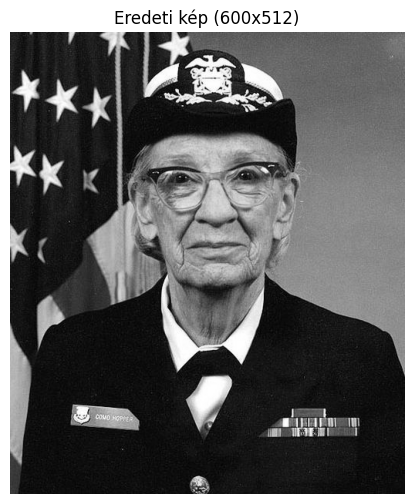


SVD komponensek méretei:
U: (600, 512)
s (szinguláris értékek): (512,)
VT (V transzponált): (512, 512)


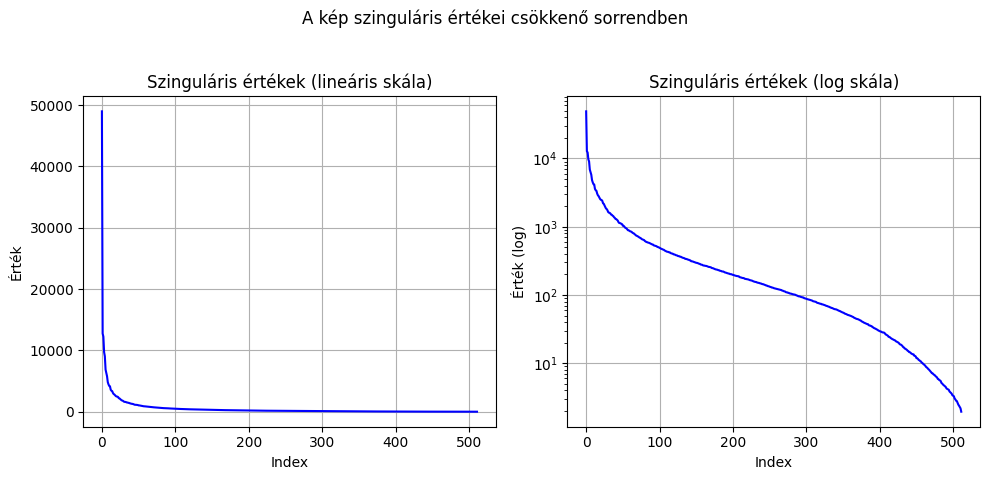


Figyeld meg, milyen gyorsan csökkennek a szinguláris értékek!
Ez azt jelenti, hogy a kép információjának nagy részét az első néhány érték hordozza.


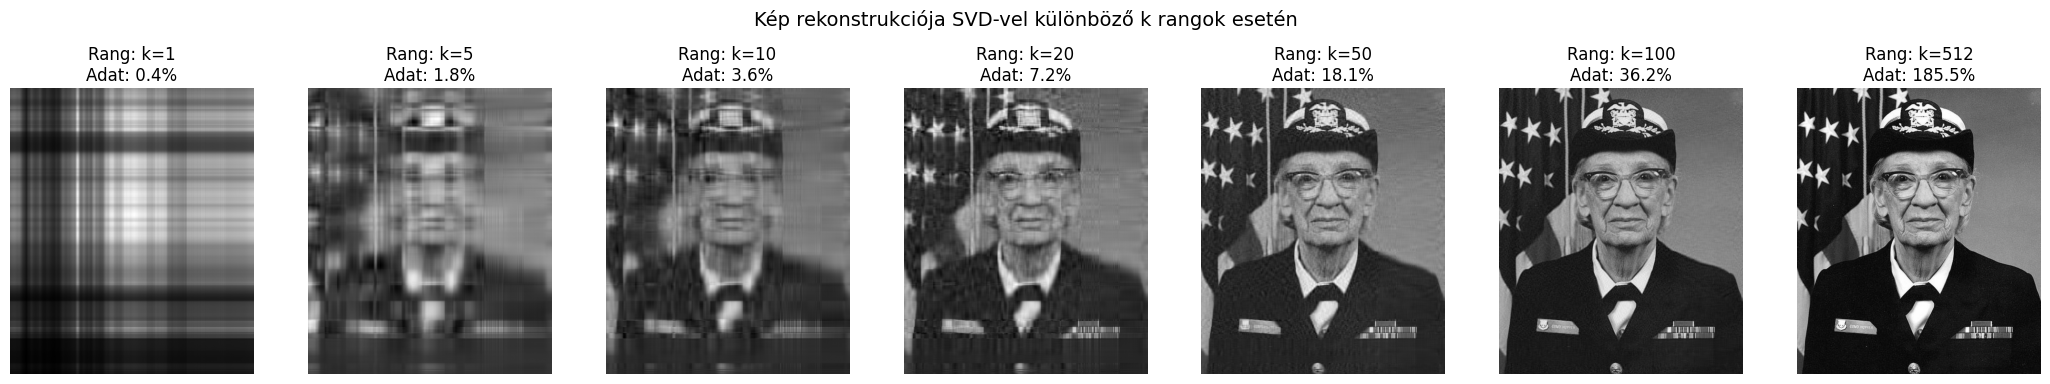


Magyarázat:
A fenti képsorozat azt mutatja, hogyan néz ki a kép, ha csak az első k 'legfontosabb' SVD komponenst használjuk fel.
- k=1: Csak a legdominánsabb irány szerinti információ látszik.
- Ahogy növeljük k értékét, egyre több részlet jelenik meg.
- Figyeld meg, hogy már viszonylag kis k értékkel (pl. k=20 vagy k=50) is egész jó közelítést kapunk az eredeti képhez!
- A százalékos érték mutatja, hogy az adott rangú közelítés tárolásához mennyi adat szükséges az eredeti kép méretéhez képest. Minél kisebb k, annál nagyobb a tömörítés.
- A maximális rangú rekonstrukciónak (jobb szélső kép) meg kell egyeznie az eredeti képpel (a numerikus pontatlanságoktól eltekintve).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import requests
from io import BytesIO
from PIL import Image # PIL használata a szürkeárnyalatossá alakításhoz

# --- Beállítások ---
# Kép URL-je (próbálkozhatsz más URL-ekkel is)
# image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/Gooseneck_State_Park%2C_Utah.jpg/1024px-Gooseneck_State_Park%2C_Utah.jpg" # Példa tájkép
image_url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png" # Klasszikus Lena tesztkép

# Alternatíva: Matplotlib beépített kép használata (ha a fenti URL nem működik)
try:
    # Grace Hopper portréja
    from matplotlib.cbook import get_sample_data
    image_path = get_sample_data('grace_hopper.jpg')
    img_pil = Image.open(image_path)
except ImportError:
    print("Matplotlib mintaadat nem érhető el, próbálkozás URL letöltéssel...")
    try:
        response = requests.get(image_url)
        response.raise_for_status() # Hibaellenőrzés
        img_pil = Image.open(BytesIO(response.content))
    except Exception as e:
        print(f"Hiba a kép letöltésekor: {e}")
        # Ha minden kötél szakad, hozzunk létre egy egyszerű mátrixot
        img_pil = None
        img_gray_np = np.random.rand(100, 100) * 255 # Véletlen zaj kép


# Kép átalakítása szürkeárnyalatossá és NumPy tömbbé
if img_pil:
  img_gray_pil = img_pil.convert('L') # 'L' mód a szürkeárnyalatoshoz
  img_gray_np = np.array(img_gray_pil, dtype=float) # Float típus a számításokhoz

A = img_gray_np
print(f"Kép betöltve és szürkeárnyalatossá alakítva.")
print(f"Mátrix mérete (magasság x szélesség): {A.shape}")

# --- Eredeti kép megjelenítése ---
plt.figure(figsize=(6, 6))
plt.imshow(A, cmap='gray')
plt.title(f"Eredeti kép ({A.shape[0]}x{A.shape[1]})")
plt.axis('off')
plt.show()

# --- SVD Kiszámítása ---
# full_matrices=False a redukált SVD-t adja (hatékonyabb)
# U mérete (m, r), s mérete (r,), VT mérete (r, n), ahol r = min(m, n)
U, s, VT = np.linalg.svd(A, full_matrices=False)

print(f"\nSVD komponensek méretei:")
print(f"U: {U.shape}")
print(f"s (szinguláris értékek): {s.shape}")
print(f"VT (V transzponált): {VT.shape}")

# --- Szinguláris értékek ábrázolása ---
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(s, 'b-')
plt.title("Szinguláris értékek (lineáris skála)")
plt.xlabel("Index")
plt.ylabel("Érték")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.semilogy(s, 'b-') # Logaritmikus skála az Y tengelyen
plt.title("Szinguláris értékek (log skála)")
plt.xlabel("Index")
plt.ylabel("Érték (log)")
plt.grid(True)

plt.suptitle("A kép szinguláris értékei csökkenő sorrendben")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nFigyeld meg, milyen gyorsan csökkennek a szinguláris értékek!")
print("Ez azt jelenti, hogy a kép információjának nagy részét az első néhány érték hordozza.")

# --- Kép rekonstrukciója különböző rangokkal (k) ---

# Választott rangok a megjelenítéshez
ranks_to_show = [1, 5, 10, 20, 50, 100, min(A.shape)] # Mutassuk meg a max rangot is
ranks_to_show = [r for r in ranks_to_show if r <= s.shape[0]] # Csak létező rangok

num_ranks = len(ranks_to_show)
plt.figure(figsize=(num_ranks * 3, 4)) # Méret igazítása a képek számához

for i, k in enumerate(ranks_to_show):
    # Rekonstrukció az első k szinguláris értékkel/vektorral
    U_k = U[:, :k]
    s_k = s[:k]
    VT_k = VT[:k, :]

    # A_k = U_k @ np.diag(s_k) @ VT_k
    # Hatékonyabb számítás: (U_k * s_k) @ VT_k
    # Mivel s_k 1D tömb, a szorzáshoz ki kell terjeszteni, vagy a fenti formát használni
    A_reconstructed_k = U_k @ np.diag(s_k) @ VT_k


    # Tömörítési arány becslése
    original_size = A.size # m * n
    # SVD tárolás: U_k (m*k) + s_k (k) + VT_k (k*n)
    compressed_size = U_k.size + s_k.size + VT_k.size
    compression_ratio = compressed_size / original_size * 100

    # Kép megjelenítése
    ax = plt.subplot(1, num_ranks, i + 1)
    ax.imshow(A_reconstructed_k, cmap='gray')
    ax.set_title(f"Rang: k={k}\nAdat: {compression_ratio:.1f}%")
    ax.axis('off')

plt.suptitle("Kép rekonstrukciója SVD-vel különböző k rangok esetén", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.92])
plt.show()

print("\nMagyarázat:")
print("A fenti képsorozat azt mutatja, hogyan néz ki a kép, ha csak az első k 'legfontosabb' SVD komponenst használjuk fel.")
print("- k=1: Csak a legdominánsabb irány szerinti információ látszik.")
print("- Ahogy növeljük k értékét, egyre több részlet jelenik meg.")
print("- Figyeld meg, hogy már viszonylag kis k értékkel (pl. k=20 vagy k=50) is egész jó közelítést kapunk az eredeti képhez!")
print("- A százalékos érték mutatja, hogy az adott rangú közelítés tárolásához mennyi adat szükséges az eredeti kép méretéhez képest. Minél kisebb k, annál nagyobb a tömörítés.")
print("- A maximális rangú rekonstrukciónak (jobb szélső kép) meg kell egyeznie az eredeti képpel (a numerikus pontatlanságoktól eltekintve).")

In [ ]:
from IPython.display import display, HTML

# A teljes HTML kód bemásolva egy Python stringbe
html_content = """
<!DOCTYPE html>
<html lang="hu">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Lineáris Algebra Kvíz</title>
    <style>
        body {
            font-family: sans-serif;
            display: flex;
            justify-content: center;
            align-items: center;
            min-height: 100vh;
            background-color: #f0f0f0;
        }
        .quiz-container {
            background-color: white;
            padding: 30px;
            border-radius: 10px;
            box-shadow: 0 0 15px rgba(0,0,0,0.1);
            width: 90%;
            max-width: 600px;
            text-align: center;
        }
        #question {
            font-size: 1.2em;
            margin-bottom: 20px;
            min-height: 4em; /* Hely fenntartása a kérdésnek */
        }
        .options-container button {
            display: block;
            width: 100%;
            padding: 15px;
            margin: 10px 0;
            border: 1px solid #ccc;
            border-radius: 5px;
            background-color: #f9f9f9;
            font-size: 1em;
            cursor: pointer;
            transition: background-color 0.3s;
        }
        .options-container button:hover:not([disabled]) {
            background-color: #e0e0e0;
        }
        .options-container button.correct {
            background-color: #90ee90; /* Világoszöld */
            border-color: #228b22;
            color: black;
        }
        .options-container button.incorrect {
            background-color: #f08080; /* Világospiros */
            border-color: #dc143c;
            color: black;
        }
        #feedback {
            margin-top: 15px;
            font-weight: bold;
            min-height: 1.5em; /* Hely fenntartása */
        }
        #feedback.correct {
            color: #228b22; /* Sötétzöld */
        }
        #feedback.incorrect {
            color: #dc143c; /* Sötétpiros */
        }
        #next-btn {
            display: none; /* Alapból rejtett */
            padding: 10px 20px;
            margin-top: 20px;
            font-size: 1em;
            cursor: pointer;
            background-color: #007bff;
            color: white;
            border: none;
            border-radius: 5px;
        }
        #result {
            margin-top: 20px;
        }
        #result h2 {
            margin-bottom: 15px;
        }
    </style>
</head>
<body>
    <div class="quiz-container">
        <h1>Lineáris Algebra Kvíz</h1>
        <div id="quiz-area">
            <p id="question">A kvíz betöltése...</p>
            <div id="options" class="options-container">
                </div>
            <p id="feedback"></p>
            <button id="next-btn">Következő Kérdés</button>
        </div>
        <div id="result" style="display: none;">
            <h2>Kvíz vége!</h2>
            <p id="score-text"></p>
            <button onclick="location.reload()">Újrapróbálkozás</button>
        </div>
    </div>

    <script>
        const quizData = [
          {
            question: "Mi a λ skalár és az x ≠ 0 vektor kapcsolata az Ax = λx egyenletben?",
            options: [
              "λ az A determinánsa, x tetszőleges vektor.",
              "λ az A egy sajátértéke, x a hozzá tartozó sajátvektor.",
              "λ tetszőleges szám, x a nullvektor.",
              "λ az A rangja, x egy bázisvektor."
            ],
            answer: "λ az A egy sajátértéke, x a hozzá tartozó sajátvektor."
          },
          {
            question: "Igaz vagy Hamis: Egy mátrix minden sajátvektorának iránya megváltozik, ha megszorozzuk a mátrixszal.",
            options: ["Igaz", "Hamis"],
            answer: "Hamis"
          },
          {
            question: "Melyik vektornorma számítása hasonlít a 'légvonalbeli távolság' méréséhez?",
            options: [
                "L1 norma (Manhattan)",
                "L2 norma (Euklideszi)",
                "L-végtelen norma (Maximum)"
            ],
            answer: "L2 norma (Euklideszi)"
          },
          {
            question: "Igaz vagy Hamis: Ha egy mátrix kondíciószáma nagyon nagy, az numerikusan stabil rendszert jelez.",
            options: ["Igaz", "Hamis"],
            answer: "Hamis"
          },
          {
              question: "Mi a gyakorlati következménye, ha egy Ax=b rendszer A mátrixa rosszul kondicionált, és b-t csak kis hibával ismerjük?",
              options: [
                  "A megoldás (x) pontosabb lesz.",
                  "A megoldás (x) érzéketlen lesz a b hibájára.",
                  "A b kis hibája nagy hibát okozhat a megoldásban (x).",
                  "A rendszernek biztosan nincs megoldása."
              ],
              answer: "A b kis hibája nagy hibát okozhat a megoldásban (x)."
          },
          {
            question: "Melyik mátrixfelbontás alkalmazható BÁRMILYEN (akár nem négyzetes) mátrixra?",
            options: [
                "Sajátérték Felbontás (EVD)",
                "Szinguláris Érték Felbontás (SVD)",
                "LU Felbontás",
                "Cholesky Felbontás"
            ],
            answer: "Szinguláris Érték Felbontás (SVD)"
          },
          {
            question: "Igaz vagy Hamis: Az SVD (A = UΣVᵀ) felbontásban az U és V mátrixok MINDIG ortogonálisak.",
            options: ["Igaz", "Hamis"],
            answer: "Igaz"
          },
          {
              question: "Mi az SVD alapú alacsony rangú közelítés (A ≈ U<0xE2><0x82><0x96>Σ<0xE2><0x82><0x96>V<0xE2><0x82><0x96>ᵀ) legfőbb haszna?",
              options: [
                  "A mátrix determinánsának kiszámítása.",
                  "Adattömörítés és zajszűrés.",
                  "A mátrix nyomának meghatározása.",
                  "Lineáris egyenletrendszer pontos megoldása."
              ],
              answer: "Adattömörítés és zajszűrés."
          },
           {
              question: "Hogyan határozható meg egy mátrix rangja az SVD segítségével?",
              options: [
                "A legnagyobb szinguláris értékkel.",
                "A nullától különböző szinguláris értékek számával.",
                "Az U mátrix dimenziójával.",
                "A V mátrix determinánsával."
              ],
              answer: "A nullától különböző szinguláris értékek számával."
          },
          {
              question: "Igaz vagy Hamis: Egy n x n-es mátrix pontosan akkor invertálható, ha a rangja n (azaz teljes rangú).",
              options: ["Igaz", "Hamis"],
              answer: "Igaz"
          }
        ];

        const questionElement = document.getElementById('question');
        const optionsElement = document.getElementById('options');
        const feedbackElement = document.getElementById('feedback');
        const nextBtn = document.getElementById('next-btn');
        const quizArea = document.getElementById('quiz-area');
        const resultArea = document.getElementById('result');
        const scoreText = document.getElementById('score-text');

        let currentQuestionIndex = 0;
        let score = 0;

        function startQuiz() {
            currentQuestionIndex = 0;
            score = 0;
            quizArea.style.display = 'block';
            resultArea.style.display = 'none';
            nextBtn.style.display = 'none';
            feedbackElement.textContent = '';
            showQuestion();
        }

        function showQuestion() {
            resetState();
            const currentQuestion = quizData[currentQuestionIndex];
            questionElement.textContent = `${currentQuestionIndex + 1}. ${currentQuestion.question}`;

            currentQuestion.options.forEach(option => {
                const button = document.createElement('button');
                button.textContent = option;
                button.classList.add('option-btn');
                button.addEventListener('click', selectAnswer);
                optionsElement.appendChild(button);
            });
        }

        function resetState() {
            nextBtn.style.display = 'none';
            feedbackElement.textContent = '';
            feedbackElement.className = ''; // Törli a correct/incorrect osztályokat
            while (optionsElement.firstChild) {
                optionsElement.removeChild(optionsElement.firstChild);
            }
        }

        function selectAnswer(e) {
            const selectedBtn = e.target;
            const isCorrect = selectedBtn.textContent === quizData[currentQuestionIndex].answer;

            if (isCorrect) {
                score++;
                selectedBtn.classList.add('correct');
                feedbackElement.textContent = 'Helyes válasz!';
                feedbackElement.className = 'correct';
            } else {
                selectedBtn.classList.add('incorrect');
                feedbackElement.textContent = `Helytelen! A helyes válasz: ${quizData[currentQuestionIndex].answer}`;
                feedbackElement.className = 'incorrect';
                // Megjelöljük a helyes választ is
                Array.from(optionsElement.children).forEach(button => {
                    if (button.textContent === quizData[currentQuestionIndex].answer) {
                        button.classList.add('correct');
                    }
                });
            }

            // Letiltjuk a további válaszadást erre a kérdésre
            Array.from(optionsElement.children).forEach(button => {
                button.disabled = true;
            });

            nextBtn.style.display = 'block'; // Megjelenítjük a Tovább gombot
        }

        function showResult() {
            quizArea.style.display = 'none';
            resultArea.style.display = 'block';
            scoreText.textContent = `Eredményed: ${score} pont a ${quizData.length}-ból.`;
        }

        nextBtn.addEventListener('click', () => {
            currentQuestionIndex++;
            if (currentQuestionIndex < quizData.length) {
                showQuestion();
            } else {
                showResult();
            }
        });

        // Kvíz indítása betöltéskor
        startQuiz();
    </script>
</body>
</html>
"""

# Próbáljuk megjeleníteni
display(HTML(html_content))